<img src="./img/banner.png">

# Laboratorio 2 - BancAlpes

1. Carga y exploración de datos.

    1.1. Importación de librerias.
    
    1.2. Carga de datos.
    
    1.3. Exploración.
    
2. Limpieza y preparación de los datos.

    2.1. Tipo adecuado de cada atributo.
    
    2.2. Selección de atributos.
    
3. Clasificadores.

    3.1.1. K-means.
    
    3.1.1. Clustering jerárquico.
    
    3.1.1. GMMs

## 1. Carga y exploración de datos.

### 1.1. Importación de librerias.

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# modelos
#K means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


# Clustering jerarquico
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# GMMs
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from plotnine import *


#Librerías para la visualización
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### 1.2. Carga de datos.

In [2]:
# carga de los datos
# csv -> dataFrame
df_clients = pd.read_csv('./datos/BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8' )

### 1.3. Exploración.

In [3]:
#cantidad de datos y numero de variables
df_clients.shape

(660, 11)

In [4]:
# mostrar 5 filas al azar
df_clients.sample(5)

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
58,59,71632,200000,Female,1,Single,34,1,0,4,7
71,72,35149,320000,M,2,Single,29,3,2,2,7
288,289,49331,100000,Female,2,Single,25,5,2,2,4
55,56,68419,500000,Female,1,Married,45,1,2,2,4
158,159,24054,210000,Male,3,Married,45,3,2,5,9


In [5]:
# ver todos los tipos de variables 
df_clients.dtypes

Id                      int64
Customer               object
Limit_bal              object
Sex                    object
Education              object
Marriage               object
Age                    object
Total_Credit_Cards     object
Total_visits_bank      object
Total_visits_online    object
Total_calls_made       object
dtype: object

In [6]:
#cantidad de datos nulos
df_clients.isnull().sum()

Id                     0
Customer               0
Limit_bal              0
Sex                    0
Education              0
Marriage               0
Age                    0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No existen datos nulos.

## 2. Limpieza y preparación de los datos.

### 2.1. Tipo adecuado de cada atributo.

Primero realizaremos el cambio de tipo de cada columna, acorde con el tipo de datos que maneja.

In [7]:
# ver todos los tipos de variables 
df_clients.dtypes

Id                      int64
Customer               object
Limit_bal              object
Sex                    object
Education              object
Marriage               object
Age                    object
Total_Credit_Cards     object
Total_visits_bank      object
Total_visits_online    object
Total_calls_made       object
dtype: object

Podemos observar que casi todos los datos los identifica como `object`, entonces procederemos a cambiarlos a su tipo adecuado.

Al intentar cambiar el tipo de cada columna a entero, nos arroja un error: ` ValueError: invalid literal for int() with base 10: '-' `
Esto es debido a que existen datos o caracteres que no corresponden en la columna a cambiar, en este caso existe el caracter '-' el cual no nos permite cambiar el tipo de la columna

In [8]:
# buscamos la fila con el caracter anomalo '-'
raro = df_clients[df_clients['Customer'].str.contains('-')]
print(raro)

    Id Customer Limit_bal     Sex Education Marriage Age Total_Credit_Cards  \
11  12        -    260000  Female         1        -  51                  3   
31  32        -         -       -         -        -   -                  -   

   Total_visits_bank Total_visits_online Total_calls_made  
11                 -                   2                7  
31                 -                   -                -  


Como podemos observar las filas 11 y 32  contienen varias columnas con este valor, lo cual no aporta informacion relevante para los modelos de ML y seran eliminadas

In [9]:
# eliminamos la fila que contiene '-' en la columna Customer
df_clients = df_clients.drop(df_clients[df_clients.Customer.str.contains('-')].index)

Ahora convertimos la columna a su correspondiente tipo

In [10]:
df_clients['Customer'] = df_clients.Customer.astype(int)
df_clients['Limit_bal'] = df_clients.Limit_bal.astype(int)

 Al intentar cambiar el tipo de la columna **Education** entero, nos arroja un error: ´ValueError: invalid literal for int() with base 10: 'ABC´´

In [11]:
#verificos el tipo de datos manejados por la columna
df_clients.Education.value_counts()

2      288
1      263
3       99
5        3
4        2
6        2
ABC      1
Name: Education, dtype: int64

podemos ver que solo hay una fila con los caracteres 'ABC'

In [12]:
# buscamos la fila con el caracter anomalo 'ABC'
raro2 = df_clients[df_clients['Education'].str.contains('ABC')]
print(raro2)

    Id  Customer  Limit_bal    Sex Education Marriage Age Total_Credit_Cards  \
15  16     55196      50000  Fmale       ABC   Others  23                  2   

   Total_visits_bank Total_visits_online Total_calls_made  
15                 0                   5                7  


consideramos que al no tener precisión en el tipo de sexo (*Fmale*) y la educación (*ABC*), la fila sera eliminada de los datos.

In [13]:
# eliminamos la fila que contiene 'ABC' en la columna Education
df_clients = df_clients.drop(df_clients[df_clients.Education.str.contains('ABC')].index)

In [14]:
#Ahora convertimos la columna a su correspondiente tipo
df_clients['Education'] = df_clients.Education.astype(int)
df_clients['Age'] = df_clients.Age.astype(int)

In [15]:
# buscamos la fila con el caracter anomalo '-'
raro3 = df_clients[df_clients['Total_Credit_Cards'].str.contains('-')]
print(raro3)

    Id  Customer  Limit_bal   Sex  Education Marriage  Age Total_Credit_Cards  \
17  18     96463     320000  Male          1  Married   49                  -   

   Total_visits_bank Total_visits_online Total_calls_made  
17                 0                   3                4  


Consideramos valiosa la fila y remplazamos el valor de esta por 1, debido a que existe un monto de prestamo en el registro de *Limit_bal*.

In [16]:

df_clients.Total_Credit_Cards = df_clients.Total_Credit_Cards.replace({'-':1})

#comprobamos que no exista el caracter '-' en la columna
print( df_clients[df_clients['Total_Credit_Cards']=='-'] )

#convertimos la columna en entero
df_clients['Total_Credit_Cards'] = df_clients.Total_Credit_Cards.astype(int)



Empty DataFrame
Columns: [Id, Customer, Limit_bal, Sex, Education, Marriage, Age, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


In [17]:
# buscamos la fila con el caracter anomalo '?'
raro4 = df_clients[df_clients['Total_visits_bank'].str.contains('\?')]
print(raro4)

    Id  Customer  Limit_bal   Sex  Education Marriage  Age  \
16  17     62617      20000  Male          1   Single   24   
38  39     52142      50000  Male          1   Single   25   

    Total_Credit_Cards Total_visits_bank Total_visits_online Total_calls_made  
16                   2                 ?                   2                4  
38                   4                 ?                   3               10  


Consideramos valiosa las filas y remplazamos sus valores por 1, debido a que existe la posibilidad de visitar el banco por lo menos una vez para abrir una cuenta.

In [18]:
df_clients.Total_visits_bank = df_clients.Total_visits_bank.replace({'?':1})

#comprobamos el cambio
df_clients.loc[16]


Id                         17
Customer                62617
Limit_bal               20000
Sex                      Male
Education                   1
Marriage               Single
Age                        24
Total_Credit_Cards          2
Total_visits_bank           1
Total_visits_online         2
Total_calls_made            4
Name: 16, dtype: object

In [19]:
#comprobamos el cambio
df_clients.loc[38]

Id                         39
Customer                52142
Limit_bal               50000
Sex                      Male
Education                   1
Marriage               Single
Age                        25
Total_Credit_Cards          4
Total_visits_bank           1
Total_visits_online         3
Total_calls_made           10
Name: 38, dtype: object

In [20]:
df_clients['Total_visits_bank'] = df_clients.Total_visits_bank.astype(int)
df_clients['Total_visits_online'] = df_clients.Total_visits_online.astype(int)

In [21]:
# buscamos la fila con el caracter anomalo '?'
raro5 = df_clients[df_clients['Total_calls_made'].str.contains('\?')]
print(raro5)

   Id  Customer  Limit_bal     Sex  Education Marriage  Age  \
3   4     40496      50000  Female          2  Married   37   

   Total_Credit_Cards  Total_visits_bank  Total_visits_online Total_calls_made  
3                   5                  1                    1                ?  


Consideramos valiosa la fila y remplazamos su valor por 1, debido a que solo ha realizado una vista al banco y una online.

In [22]:
df_clients.Total_calls_made = df_clients.Total_calls_made.replace({'?':1})

#comprobamos el cambio
df_clients.loc[3]

Id                           4
Customer                 40496
Limit_bal                50000
Sex                     Female
Education                    2
Marriage               Married
Age                         37
Total_Credit_Cards           5
Total_visits_bank            1
Total_visits_online          1
Total_calls_made             1
Name: 3, dtype: object

In [23]:
#cambiamos el tipo de la columna
df_clients['Total_calls_made'] = df_clients.Total_calls_made.astype(int)

In [24]:
#comprobamos los tipos de las columnas
df_clients.dtypes

Id                      int64
Customer                int64
Limit_bal               int64
Sex                    object
Education               int64
Marriage               object
Age                     int64
Total_Credit_Cards      int64
Total_visits_bank       int64
Total_visits_online     int64
Total_calls_made        int64
dtype: object

Ahora convertimos las columnas de *Sex* y *Marriage* en datos numericos para poder integralos al modelo.

In [25]:
#comprobamos los datos de Sex
df_clients.Sex.value_counts()

Female    371
Male      273
M           3
F           3
Mael        3
f           2
Femael      1
9           1
Name: Sex, dtype: int64

In [26]:
# buscamos la fila con el caracter anomalo '9'
raro6 = df_clients[df_clients['Sex'].str.contains('9')]
print(raro6)

    Id  Customer  Limit_bal Sex  Education Marriage  Age  Total_Credit_Cards  \
70  71     21976      80000   9          1   Single   31                   1   

    Total_visits_bank  Total_visits_online  Total_calls_made  
70                  2                    4                 7  


consideramos borrar esta fila, debido a que creemos que impactara en el modelo.

In [27]:
df_clients = df_clients.drop([70], axis=0)

#comprobamos si se elimino.
raro6 = df_clients[df_clients['Sex'].str.contains('9')]
print(raro6)

Empty DataFrame
Columns: [Id, Customer, Limit_bal, Sex, Education, Marriage, Age, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


In [28]:
#reemplazamos los M => Male
df_clients.Sex = df_clients.Sex.replace({'M ':'Male'})

#reemplazamos los F => Female
df_clients.Sex = df_clients.Sex.replace({'F':'Female'})

#reemplazamos los Mael => Male
df_clients.Sex = df_clients.Sex.replace({'Mael':'Male'})

#reemplazamos los f => Female
df_clients.Sex = df_clients.Sex.replace({'f':'Female'})

#reemplazamos los Femael => Female
df_clients.Sex = df_clients.Sex.replace({'Femael':'Female'})

In [29]:
#comprobamos los datos de Sex
df_clients.Sex.value_counts()

Female    377
Male      279
Name: Sex, dtype: int64

In [30]:
#mapping para la columna de sex
sexMaping = {'Female':0,'Male':1}
df_clients['Sex'] = df_clients['Sex'].map(sexMaping)

#comprobamos el map
df_clients.Sex.value_counts()

0    377
1    279
Name: Sex, dtype: int64

In [31]:
df_clients.Marriage.value_counts()

Single     378
Married    260
Others       8
1            5
2            3
?            1
0            1
Name: Marriage, dtype: int64

In [32]:
#reemplazamos los 1 => Others
df_clients.Marriage = df_clients.Marriage.replace({ '1':'Others'})

#reemplazamos los 2 => Others
df_clients.Marriage = df_clients.Marriage.replace({ '2':'Others'})

#reemplazamos los ? => Others
df_clients.Marriage = df_clients.Marriage.replace({ '?':'Others'})

#reemplazamos los ? => Others
df_clients.Marriage = df_clients.Marriage.replace({ '0' :'Others'})

In [33]:
#comprobamos los cambios
df_clients.Marriage.value_counts()

Single     378
Married    260
Others      18
Name: Marriage, dtype: int64

In [34]:
#mapping para la columna de sex
MarriageMaping = {'Single':0,'Married':1,'Others':2}
df_clients['Marriage'] = df_clients['Marriage'].map(MarriageMaping)

#comprobamos el map
df_clients.Marriage.value_counts()

0    378
1    260
2     18
Name: Marriage, dtype: int64

In [35]:
#Finalmente las estadisiticas descriptivas.
df_clients.describe()

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,6.560000e+02,656.000000,656.000000,656.000000
mean,332.315549,55230.647866,170182.926829,0.425305,1.783537,0.451220,95.493902,1.882010e+05,2.413110,2.597561,3.559451
std,189.813037,25657.650223,129855.927499,0.494766,0.778786,0.550418,1435.931970,4.820178e+06,1.630364,2.941090,2.864812
min,1.000000,11265.000000,10000.000000,0.000000,1.000000,0.000000,21.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,168.750000,33952.500000,50000.000000,0.000000,1.000000,0.000000,28.000000,3.000000e+00,1.000000,1.000000,1.000000
50%,332.500000,53907.000000,140000.000000,0.000000,2.000000,0.000000,33.500000,5.000000e+00,2.000000,2.000000,3.000000
75%,496.250000,77439.000000,240000.000000,1.000000,2.000000,1.000000,41.000000,6.000000e+00,4.000000,4.000000,5.000000
max,660.000000,99843.000000,630000.000000,1.000000,6.000000,2.000000,36745.000000,1.234568e+08,5.000000,15.000000,10.000000


### 2.2. Selección de atributos.

En este punto deseamos conocer cuales son las columnas más importantes para nuestro modelo, aquellas que aporten valor y sirvan para crear modelos más precisos y exactos. Para este punto necesitamos conocimiento sobre cada atributo y como este podria impactar en la prediccion del modelo.

Eliminamos las columnas de **Id** y de **Customer** al no aportar nada para el rendimiento del modelo

In [36]:
df_clients_A = df_clients
del df_clients_A['Id']
del df_clients_A['Customer']

In [37]:
#comprobamos la eliminacion
df_clients_A.dtypes

Limit_bal              int64
Sex                    int64
Education              int64
Marriage               int64
Age                    int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [38]:
# verificamos los rangos
df_clients_A.describe()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,656.000000,656.000000,656.000000,656.000000,656.000000,6.560000e+02,656.000000,656.000000,656.000000
mean,170182.926829,0.425305,1.783537,0.451220,95.493902,1.882010e+05,2.413110,2.597561,3.559451
std,129855.927499,0.494766,0.778786,0.550418,1435.931970,4.820178e+06,1.630364,2.941090,2.864812
min,10000.000000,0.000000,1.000000,0.000000,21.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,0.000000,28.000000,3.000000e+00,1.000000,1.000000,1.000000
50%,140000.000000,0.000000,2.000000,0.000000,33.500000,5.000000e+00,2.000000,2.000000,3.000000
75%,240000.000000,1.000000,2.000000,1.000000,41.000000,6.000000e+00,4.000000,4.000000,5.000000
max,630000.000000,1.000000,6.000000,2.000000,36745.000000,1.234568e+08,5.000000,15.000000,10.000000


Encontramos anomalias en las columnas de **Age** y de **Total_Credit_Cards**

In [39]:
df_clients_A[ df_clients_A['Age'] > 130 ]

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
42,10000,1,2,0,2202,4,2,3,4
46,20000,0,1,0,36745,1,2,2,5
50,70000,1,3,2,789,1,0,5,9


Consideramos eliminar estas filas, debido a que desconocemos la edad real. Debido a que estas pueden impactar en el rendimiento del modelo.

In [40]:
df_clients_A = df_clients_A.drop([42,46,50], axis=0)

#comprobamos
df_clients_A[ df_clients_A['Age'] > 130 ]


,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [41]:
df_clients_A[ df_clients_A['Total_Credit_Cards'] > 10 ]

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
74,340000,1,1,0,32,123456789,0,5,8


In [42]:
#eliminamos la fila debido al numero anormal de tarjtas de credito
df_clients_A = df_clients_A.drop([74], axis=0)

#comprobamos
df_clients_A[ df_clients_A['Total_Credit_Cards'] > 10 ]

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [43]:
# verificamos los rangos
df_clients_A.describe()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,170552.147239,0.423313,1.783742,0.450920,35.085890,4.736196,2.421779,2.590491,3.541411
std,129739.199740,0.494463,0.778462,0.547904,9.359618,2.161180,1.629703,2.946961,2.859721
min,10000.000000,0.000000,1.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,57500.000000,0.000000,1.000000,0.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,140000.000000,0.000000,2.000000,0.000000,33.000000,5.000000,2.000000,2.000000,3.000000
75%,240000.000000,1.000000,2.000000,1.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,630000.000000,1.000000,6.000000,2.000000,75.000000,10.000000,5.000000,15.000000,10.000000


Tambien encontramos que **Education** es mejor manejar los tipos de *5=unknown* y *6=unknown*. como un solo digito que es el 4=others

In [44]:
#reemplazamos 5 y 6 => 4
df_clients_A.Education = df_clients_A.Education.replace({5:4,6:4})

#comprobamos
df_clients_A.Education.value_counts()

2    287
1    260
3     98
4      7
Name: Education, dtype: int64

In [45]:
# verificamos los rangos
df_clients_A.describe()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,170552.147239,0.423313,1.773006,0.450920,35.085890,4.736196,2.421779,2.590491,3.541411
std,129739.199740,0.494463,0.735750,0.547904,9.359618,2.161180,1.629703,2.946961,2.859721
min,10000.000000,0.000000,1.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,57500.000000,0.000000,1.000000,0.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,140000.000000,0.000000,2.000000,0.000000,33.000000,5.000000,2.000000,2.000000,3.000000
75%,240000.000000,1.000000,2.000000,1.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,630000.000000,1.000000,4.000000,2.000000,75.000000,10.000000,5.000000,15.000000,10.000000


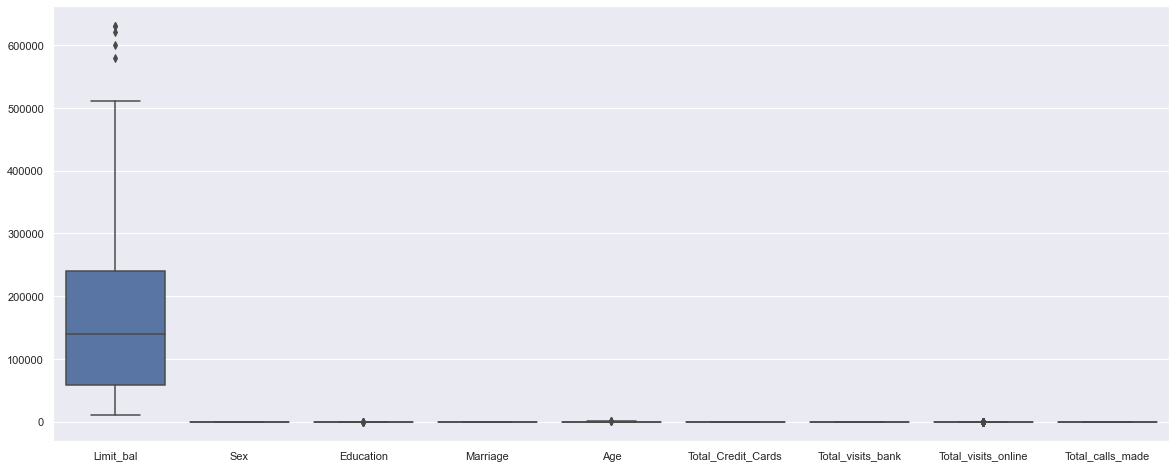

In [46]:
#Visualización de todas las variables
fig = plt.figure(figsize=(20,8))
ax= sns.boxplot( data = df_clients_A, orient="v" )

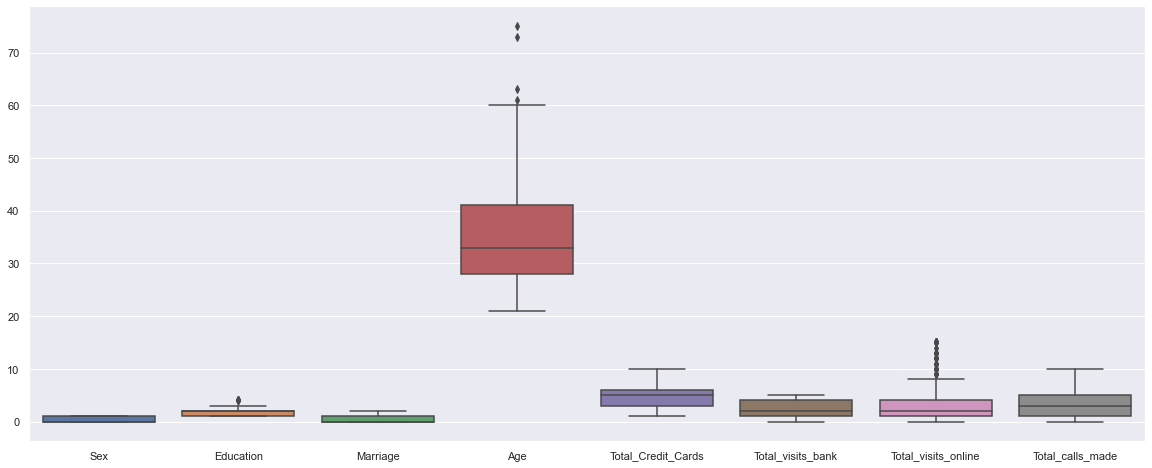

In [47]:
#Visualización de todas las variables menos Limit_bal, para ver mejor el contenido de las otras variables
df_clients_A_sinbal = df_clients_A.copy() #se realiza una copia del dataFrame para no comprometer los datos
del df_clients_A_sinbal['Limit_bal']
fig2 = plt.figure(figsize=(20,8))
ax2 = sns.boxplot( data = df_clients_A_sinbal, orient="v" )


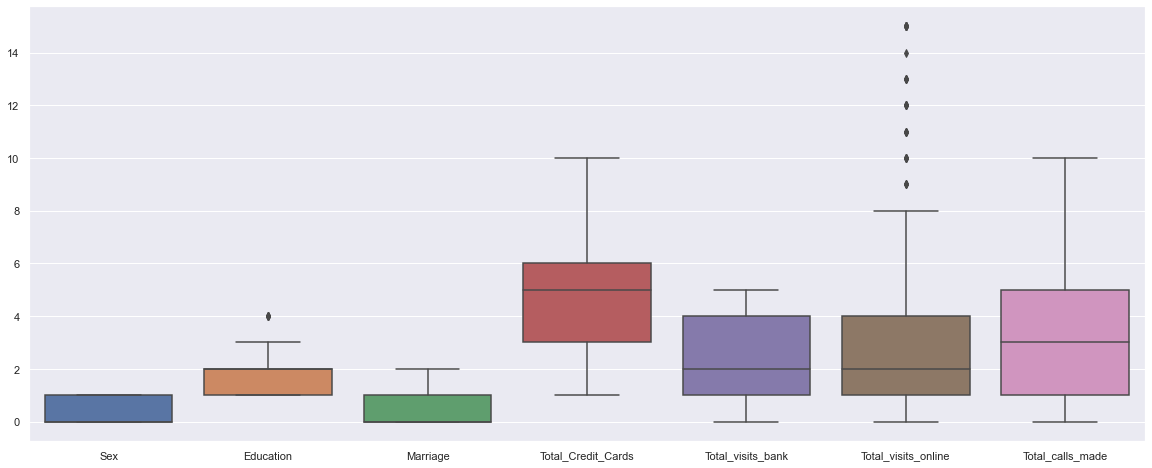

In [48]:
#Visualización de todas las variables menos Limit_bal y Age, para ver mejor el contenido de las otras variables
del df_clients_A_sinbal['Age']
fig2 = plt.figure(figsize=(20,8))
ax2 = sns.boxplot( data = df_clients_A_sinbal, orient="v" )

<function matplotlib.pyplot.show(close=None, block=None)>

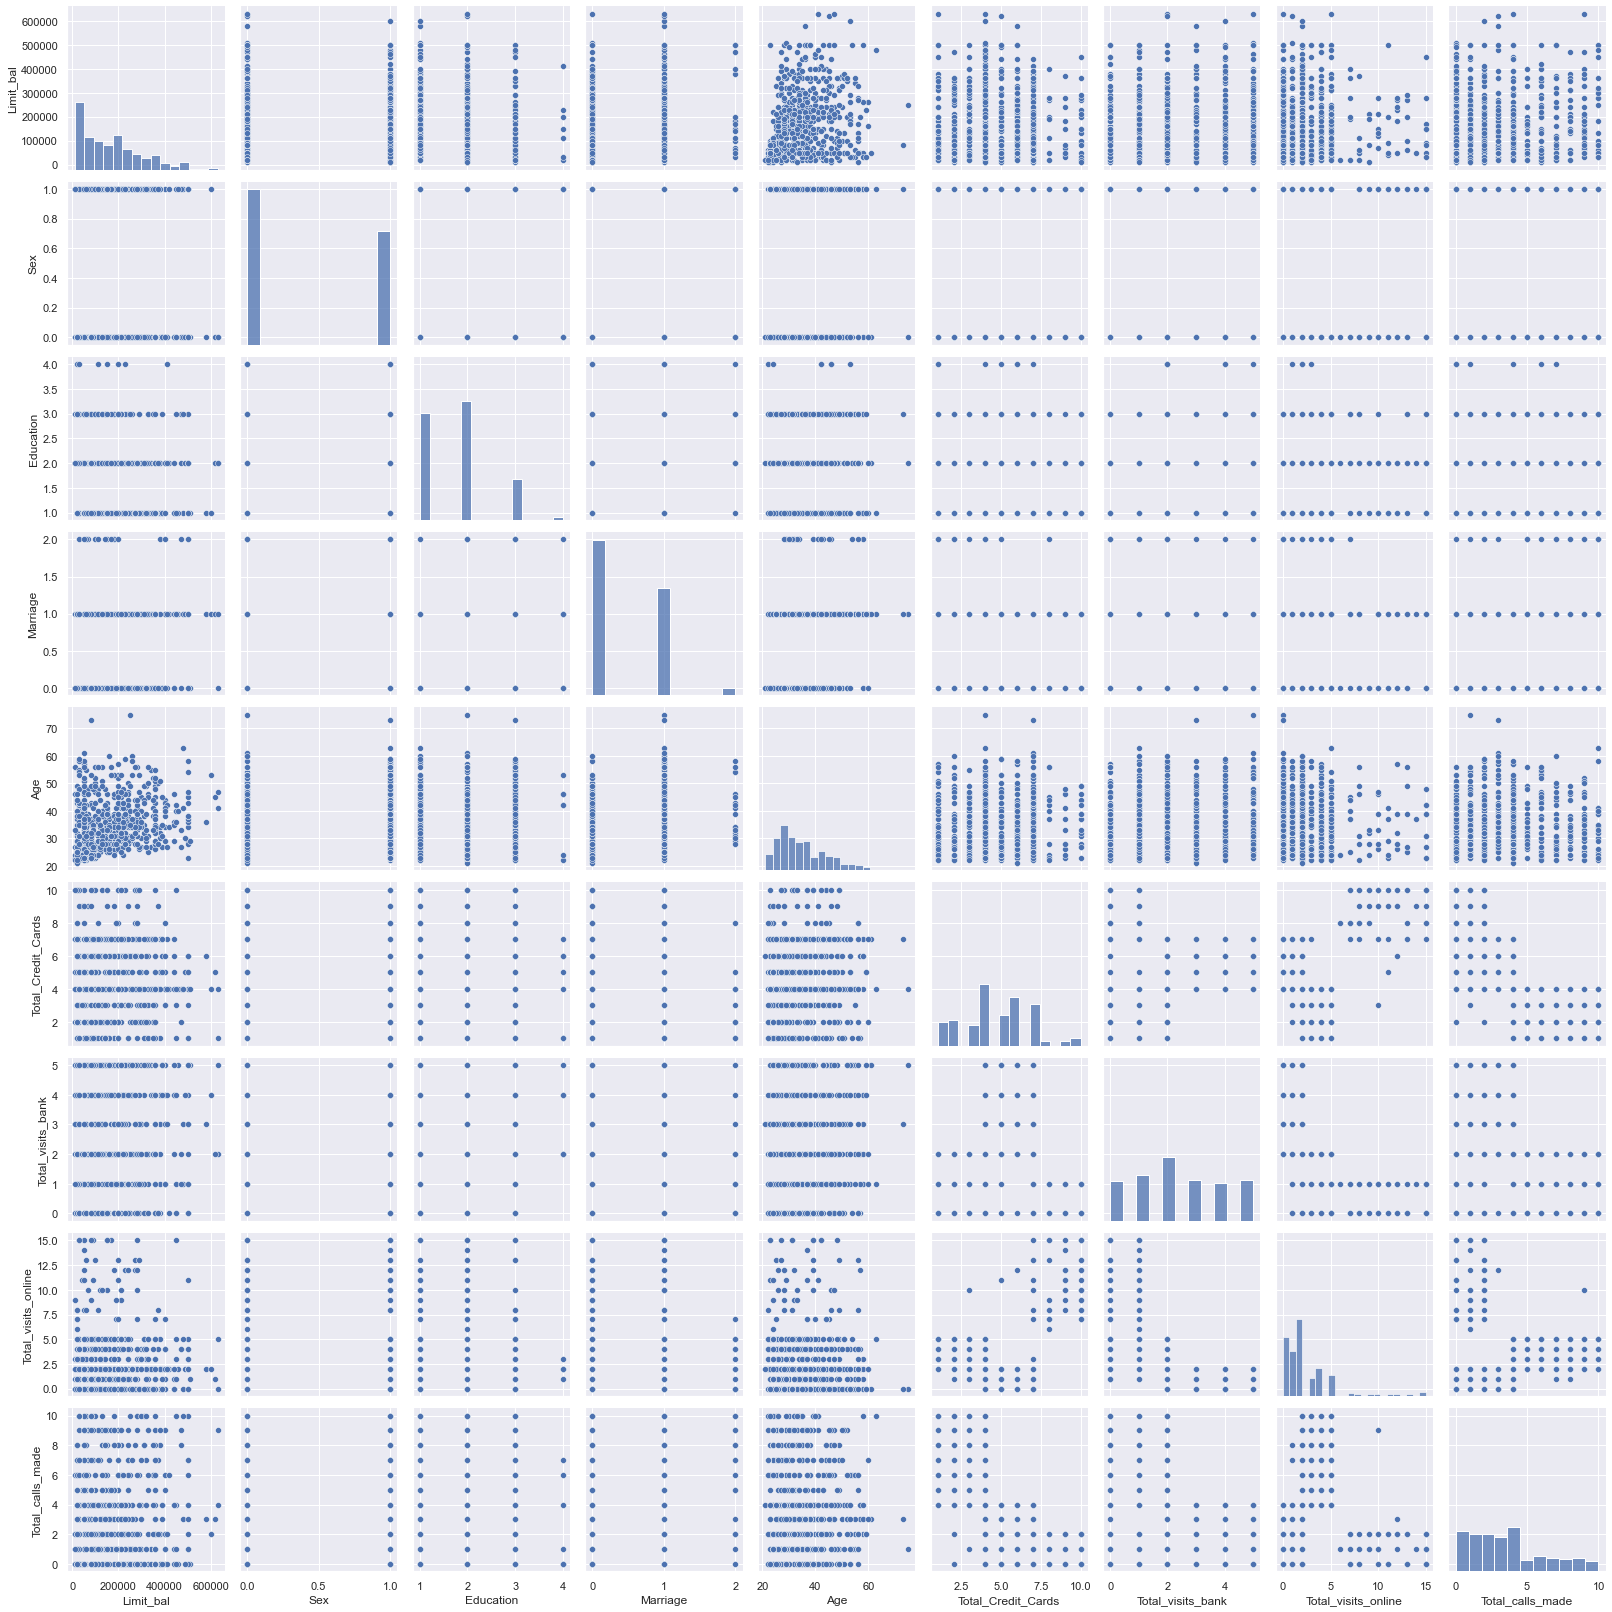

In [49]:
# visualización para lograr inferir algun tipo de relación entre los datos.
cols = ['Limit_bal','Sex','Education','Marriage','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
sns.pairplot(df_clients_A[cols],height=2.5)
plt.tight_layout()
plt.show

Logramos encontrar un tipo de relacion entre **Limit_bal** y **Age**, podria ser un tipo natural de datos.

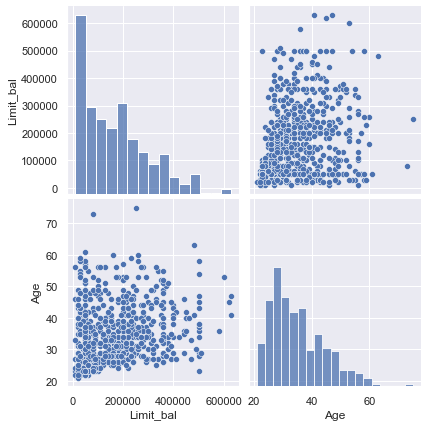

In [50]:
sns.pairplot(df_clients_A, height=3,vars=['Limit_bal','Age'],kind='scatter')

## 3. Clasificadores.

### 3.1 K-means

In [51]:
#normalizar
df_clients_pru = df_clients_A.copy()
df_clients_pru
normalized_df=(df_clients_pru-df_clients_pru.min())/(df_clients_pru.max()-df_clients_pru.min())

print(normalized_df)

     Limit_bal  Sex  Education  Marriage       Age  Total_Credit_Cards  \
0     0.016129  0.0   0.333333       0.5  0.055556            0.111111   
1     0.177419  0.0   0.333333       0.0  0.092593            0.222222   
2     0.129032  0.0   0.333333       0.0  0.240741            0.666667   
3     0.064516  0.0   0.333333       0.5  0.296296            0.444444   
4     0.064516  1.0   0.333333       0.5  0.666667            0.555556   
..         ...  ...        ...       ...       ...                 ...   
655   0.435484  1.0   0.333333       0.5  0.333333            1.000000   
656   0.451613  0.0   0.666667       0.0  0.111111            1.000000   
657   0.290323  0.0   0.000000       0.0  0.129630            0.777778   
658   0.112903  0.0   0.000000       0.0  0.037037            1.000000   
659   0.435484  0.0   0.333333       0.0  0.129630            0.888889   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                  0.2             0.066667    

In [52]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

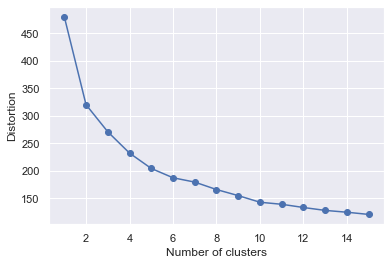

In [53]:
plot_distortion(normalized_df,1,16)

In [54]:
def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

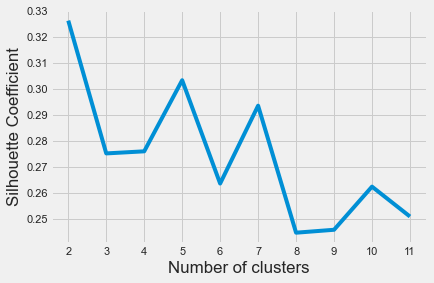

In [55]:
# Esta función puede tomar bastantes minutos!!!
plot_selectK_silhoute(normalized_df,
                    k_min=2, 
                    k_max=12)

In [56]:
normalized_df.describe()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,0.258955,0.423313,0.257669,0.225460,0.260850,0.415133,0.484356,0.172699,0.354141
std,0.209257,0.494463,0.245250,0.273952,0.173326,0.240131,0.325941,0.196464,0.285972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076613,0.000000,0.000000,0.000000,0.129630,0.222222,0.200000,0.066667,0.100000
50%,0.209677,0.000000,0.333333,0.000000,0.222222,0.444444,0.400000,0.133333,0.300000
75%,0.370968,1.000000,0.333333,0.500000,0.370370,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
name_cols_number = ['Education','Limit_bal','Age']

In [58]:
N_clusters=5
kmeans3 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans3 = kmeans3.fit(normalized_df[name_cols_number])

In [59]:
#Transformar el contenido de las columnas a arreglo
cols_number = normalized_df.to_numpy()
cols_number

array([[0.01612903, 0.        , 0.33333333, ..., 0.2       , 0.06666667,
        0.        ],
       [0.17741935, 0.        , 0.33333333, ..., 0.        , 0.66666667,
        0.9       ],
       [0.12903226, 0.        , 0.33333333, ..., 0.2       , 0.2       ,
        0.4       ],
       ...,
       [0.29032258, 0.        , 0.        , ..., 0.2       , 0.6       ,
        0.1       ],
       [0.11290323, 0.        , 0.        , ..., 0.2       , 1.        ,
        0.        ],
       [0.43548387, 0.        , 0.33333333, ..., 0.        , 0.8       ,
        0.2       ]])

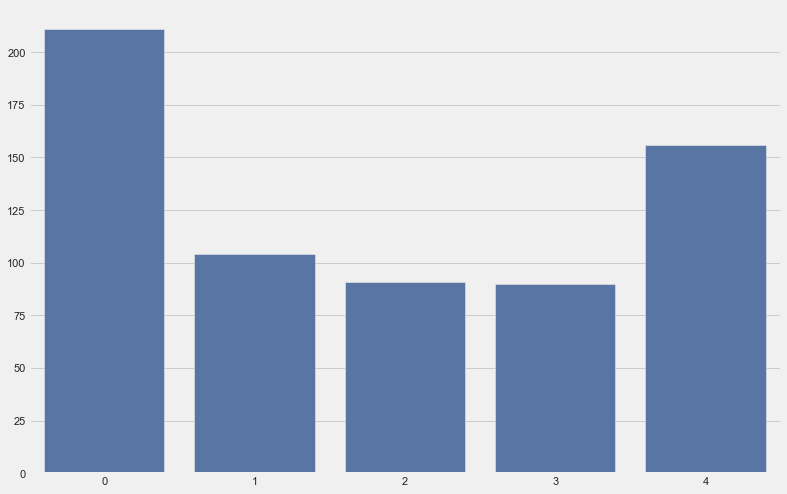

In [60]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans3.labels_
normalized_df['Cluster'] = labels

cluster_distrib = normalized_df['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [61]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
normalized_df.groupby('Cluster').count()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,,,,,
0,211,211,211,211,211,211,211,211,211
1,104,104,104,104,104,104,104,104,104
2,91,91,91,91,91,91,91,91,91
3,90,90,90,90,90,90,90,90,90
4,156,156,156,156,156,156,156,156,156


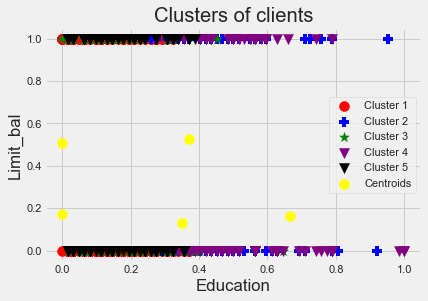

In [62]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 0 y 1
plt.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')
plt.scatter(cols_number[kmeans3.labels_ == 4, 0], cols_number[kmeans3.labels_ == 4, 1], s = 100, marker='v', c = 'black', label = 'Cluster 5')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()

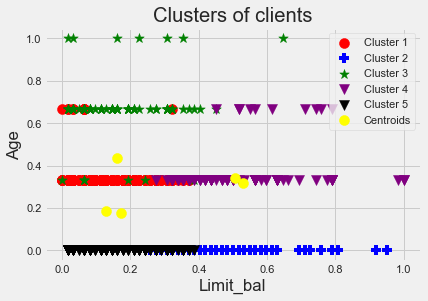

In [63]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 2], s = 100, marker='v', c = 'purple', label = 'Cluster 4')
plt.scatter(cols_number[kmeans3.labels_ == 4, 0], cols_number[kmeans3.labels_ == 4, 2], s = 100, marker='v', c = 'black', label = 'Cluster 5')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel(name_cols_number[1])
plt.ylabel(name_cols_number[2])
plt.legend()
plt.show()

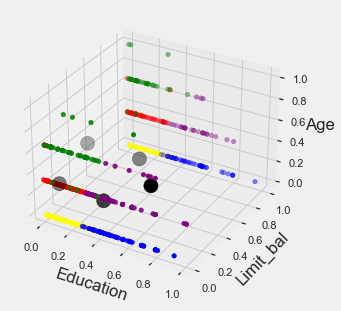

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], cols_number[kmeans3.labels_ == 0, 2],color='red')
ax.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], cols_number[kmeans3.labels_ == 2, 2],color='green')
ax.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], cols_number[kmeans3.labels_ == 1, 2],color='blue')
ax.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], cols_number[kmeans3.labels_ == 3, 2],color='purple')
ax.scatter(cols_number[kmeans3.labels_ == 4, 0], cols_number[kmeans3.labels_ == 4, 1], cols_number[kmeans3.labels_ == 4, 2],color='yellow')

ax.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(name_cols_number[0])
ax.set_ylabel(name_cols_number[1])
ax.set_zlabel(name_cols_number[2])
plt.show()

In [65]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2 3 4]


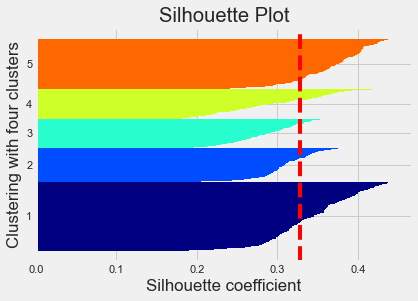

In [66]:
plot_silhouette(data = normalized_df, 
                labels = kmeans3.labels_, 
                ylabel = 'Clustering with four clusters')

### 3.2 Clustering jerárquico

Primero procederemos a normalizar todas las variables para que el algoritmo tenga un mejor performance al momento de segmentar los grupos.

In [67]:
df_clients_A_norm = ( (df_clients_A - df_clients_A.min()) / ( df_clients_A.max() - df_clients_A.min() ) )
df_clients_A_norm

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.016129,0.0,0.333333,0.5,0.055556,0.111111,0.2,0.066667,0.0
1,0.177419,0.0,0.333333,0.0,0.092593,0.222222,0.0,0.666667,0.9
2,0.129032,0.0,0.333333,0.0,0.240741,0.666667,0.2,0.200000,0.4
3,0.064516,0.0,0.333333,0.5,0.296296,0.444444,0.2,0.066667,0.1
4,0.064516,1.0,0.333333,0.5,0.666667,0.555556,0.0,0.800000,0.3
...,...,...,...,...,...,...,...,...,...
655,0.435484,1.0,0.333333,0.5,0.333333,1.000000,0.2,0.666667,0.0
656,0.451613,0.0,0.666667,0.0,0.111111,1.000000,0.2,0.866667,0.2
657,0.290323,0.0,0.000000,0.0,0.129630,0.777778,0.2,0.600000,0.1
658,0.112903,0.0,0.000000,0.0,0.037037,1.000000,0.2,1.000000,0.0


Para segmentar adecuadamente los grupos realizaremos una prueba del método silhouette para identificar el número óptimo de clusters.

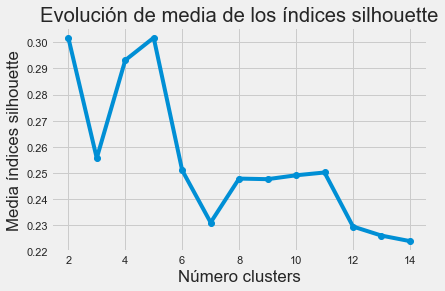

In [68]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
dfAnalisis = df_clients_A_norm #nuestro dataFrame normalizado

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(dfAnalisis)
    silhouette_avg = silhouette_score(dfAnalisis, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Podemos observar que el metodo nos indica que el numero de clusters apropiado para segmentar es de 5

Creamos el **Dendrograma**, el cual es el arbol mediante el cual se presenta el clustering jerarquico.

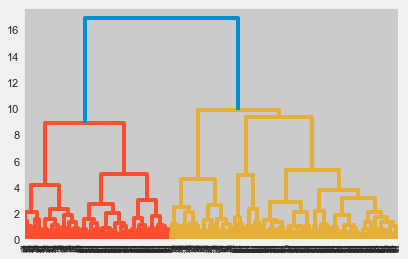

In [69]:
# realiza la agrupacion de acuerdo a la similitud de los individuos
clustering_jerarquico = linkage(df_clients_A_norm, 'ward') #Utilizamos metodo Ward para agrupar los clusteres

#graficamos el dendograma
dendrogram = sch.dendrogram(clustering_jerarquico)

Ahora con el dendrograma crearemos los clusters y realizaremos el corte en 8 para dividir el conjunto de datos en 5 grupos

In [70]:
# la funcion fcluster asigna los clusters apartir de la informacion generada con la funcion linkage

# Parametros
# t: determina el corte deseado en el dendrogranma
# criterion: es el criterio que utilizara para hacer el corte.
# distance: distancia maxima existente entre los clusters y distancia sea igual al valor de t)
clusters = fcluster(clustering_jerarquico, t=8, criterion='distance' )
clusters

array([5, 3, 5, 5, 4, 1, 4, 5, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 5, 3, 1, 1, 3, 3, 3, 5, 1,
       1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 5, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 3, 3, 1, 3, 5, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       2, 5, 5, 2, 2, 2, 5, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 2,
       5, 2, 5, 5, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 2, 5, 5, 2, 2, 2,
       5, 5, 5, 5, 2, 5, 2, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 2, 2,
       2, 2, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 2,

Agregamos una nueva columna en el df original, que indica el numero al grupo que pertenece.

In [71]:
df_clients_A_cj = df_clients_A.copy()
df_clients_A_cj['clusters'] = clusters
df_clients_A_cj.sample(4)

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
232,50000,1,2,1,26,5,4,1,0,2
600,310000,0,2,1,43,7,5,0,0,5
286,210000,1,1,0,38,4,5,0,0,2
394,360000,1,1,1,51,7,4,0,1,2


In [72]:
# contamos los valores
df_clients_A_cj['clusters'].value_counts()

5    236
2    155
3    110
1    101
4     50
Name: clusters, dtype: int64

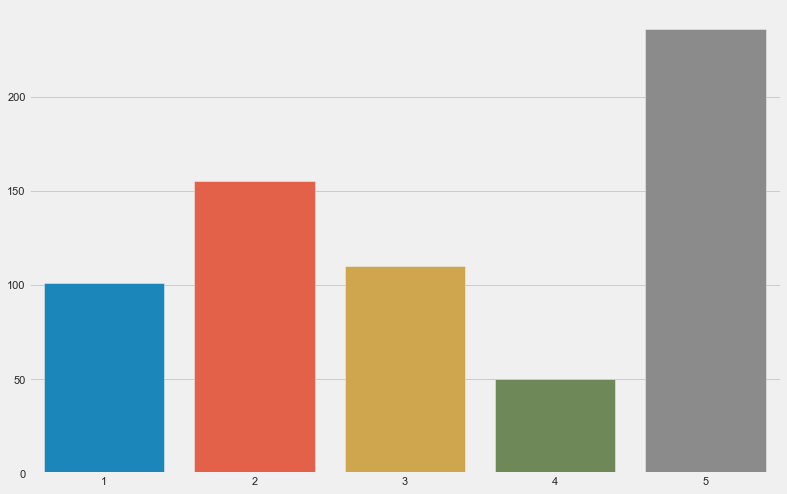

In [73]:
#graficamos
cluster_distrib = df_clients_A_cj['clusters'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values);

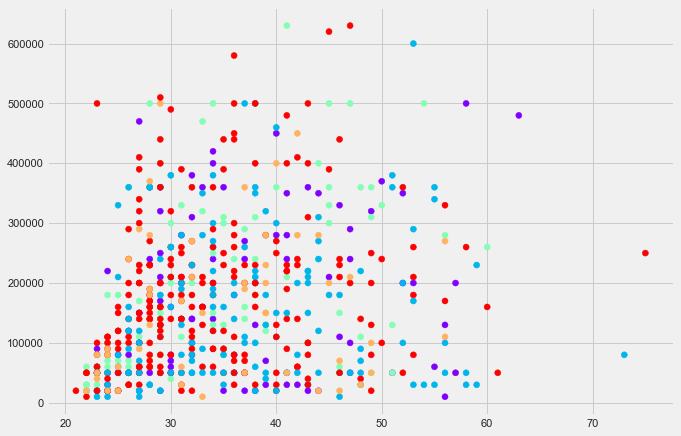

In [74]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_clients_A_cj['Age'], df_clients_A_cj['Limit_bal'],c=df_clients_A_cj['clusters'] , cmap='rainbow')  

Dado que en graficas anteriores se lograba visualizar que los grupos podians ser determinados por **Age** y **Limit_bal**, se esperaba una grafica con segmentacion clara

Ahora utilizaremos *agglomerative clustering* con nuestros datos ya diferenciados para encontrar una mejor segmentación.

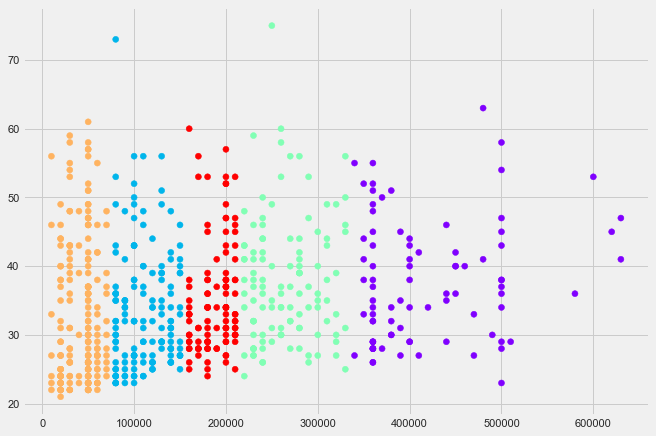

In [75]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_clients_A_cj)  

plt.figure(figsize=(10, 7))  
plt.scatter(df_clients_A_cj['Limit_bal'], df_clients_A_cj['Age'],c=cluster.labels_ , cmap='rainbow') 

Se puede ver una clara segmentacion de los grupos, determinado por el monto del credito en dolares.

In [76]:
# clusteres finales
df_clients_A_cj2 = df_clients_A_cj.copy()
df_clients_A_cj2['cl'] = cluster.labels_ 
df_clients_A_cj2.sample(4)

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters,cl
178,20000,0,2,0,22,1,1,4,7,3,3
159,50000,1,3,1,57,1,2,2,4,1,3
130,30000,0,1,0,23,3,1,5,6,3,3
617,270000,0,2,1,56,8,0,13,0,4,2


In [77]:
#exportar a .csv
df_clients_A_cj2.to_csv('gruposSegmentados.csv')

In [78]:
# clusteres finales
df_clients_A_cj3 = df_clients_A_cj.copy()
df_clients_A_cj3['cl'] = cluster.labels_ 
df_clients_A_cj3.sample(4)

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters,cl
439,80000,0,1,0,23,7,4,0,3,5,1
170,270000,1,2,0,37,2,1,2,8,1,2
452,260000,1,2,0,37,5,4,2,3,2,2
599,300000,0,2,1,36,6,2,2,0,5,2


### 3.3 Gaussian mixture models (GMMs)

Dado que es posible ver un grupo natural cuando observamos **Age** contra **Limit_bal**. Consideramos que para lograr una buena segmentacion con este algoritmo, se deben usar estas dos varibales

In [79]:
features = ['Age', "Limit_bal"]

X = df_clients_A[features].copy()

In [80]:
# Modelo
# ==============================================================================
z = StandardScaler()
X[features] = z.fit_transform(X)
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X)

GaussianMixture(n_components=4, random_state=123)

In [81]:
# Clasificación (asignación a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clusters = modelo_gmm.predict(X)
clusters

array([0, 1, 1, 2, 2, 2, 3, 0, 1, 2, 1, 3, 1, 1, 0, 3, 3, 1, 1, 1, 0, 3,
       0, 0, 0, 2, 2, 0, 1, 1, 3, 3, 1, 3, 0, 0, 1, 3, 0, 1, 2, 1, 3, 3,
       0, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 2, 2, 2, 3, 3, 2, 1, 1, 0, 1, 1,
       3, 0, 0, 3, 0, 3, 3, 3, 2, 3, 2, 1, 3, 1, 1, 2, 3, 3, 0, 1, 0, 1,
       3, 1, 0, 2, 1, 3, 3, 0, 0, 0, 2, 3, 1, 3, 3, 2, 3, 0, 2, 0, 1, 0,
       3, 1, 2, 3, 3, 3, 0, 0, 3, 1, 2, 2, 0, 3, 3, 3, 0, 1, 1, 1, 2, 0,
       3, 1, 0, 1, 2, 0, 1, 1, 0, 3, 1, 0, 3, 3, 0, 1, 1, 1, 3, 2, 2, 0,
       3, 1, 2, 1, 3, 0, 1, 0, 1, 1, 0, 0, 3, 3, 1, 2, 0, 1, 1, 1, 3, 0,
       0, 1, 3, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 3, 0, 1, 1, 1, 1, 3, 2,
       3, 3, 0, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 3, 3, 3, 1, 3, 2, 1, 3, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 3, 3, 0, 2, 0, 1, 2, 2, 3, 0, 3, 2,
       0, 2, 1, 1, 3, 0, 3, 1, 3, 3, 3, 2, 1, 1, 2, 1, 0, 3, 2, 0, 1, 1,
       3, 1, 3, 2, 3, 0, 2, 1, 0, 3, 1, 1, 1, 3, 1, 3, 0, 3, 1, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 3, 1, 2,

In [82]:
# Media de cada componente
modelo_gmm.means_

array([[-1.1338169 , -0.90401434],
       [-0.37416534,  0.02167358],
       [ 0.57176215, -0.93064099],
       [ 0.71925287,  0.96291883]])

In [83]:
# Matriz de covarianza de cada componente
modelo_gmm.covariances_

array([[[ 0.03798946,  0.01223033],
        [ 0.01223033,  0.04721895]],

       [[ 0.20386799,  0.01185037],
        [ 0.01185037,  0.33240893]],

       [[ 0.91260013, -0.00430241],
        [-0.00430241,  0.02927656]],

       [[ 0.95595807, -0.26156232],
        [-0.26156232,  0.9899343 ]]])

In [84]:
# Probabilidades
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(X)
probabilidades

array([[9.45476859e-01, 1.91647911e-02, 3.48333757e-02, 5.24973765e-04],
       [3.30250462e-01, 6.49825498e-01, 3.01820382e-03, 1.69058364e-02],
       [5.69748482e-06, 7.55216274e-01, 1.98246637e-01, 4.65313920e-02],
       ...,
       [2.68269678e-05, 9.52593178e-01, 1.08351387e-09, 4.73799942e-02],
       [8.93280226e-01, 6.05608283e-02, 4.43134187e-02, 1.84552714e-03],
       [7.59839304e-14, 7.86121589e-01, 5.68176228e-24, 2.13878411e-01]])

In [85]:
print("SILHOUETTE: ", silhouette_score(X, clusters))

SILHOUETTE:  0.2914786074901753


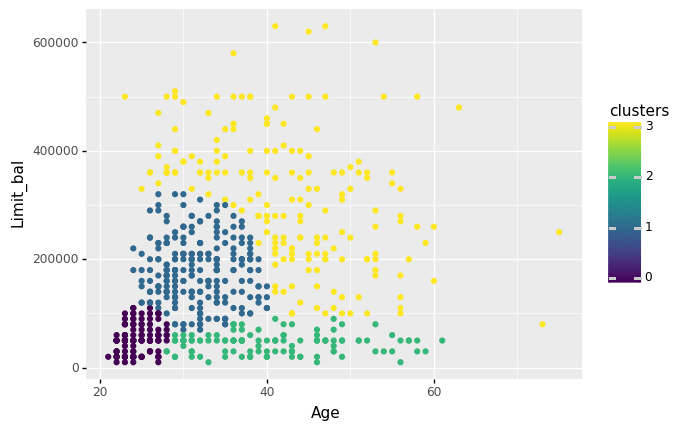

<ggplot: (8769717998638)>

In [86]:
df_clients_A["clusters"] = clusters

(ggplot(df_clients_A, aes(x="Age", y="Limit_bal", color="clusters")) + geom_point())

Comprobamos el numero de clusters optimo para el modelo

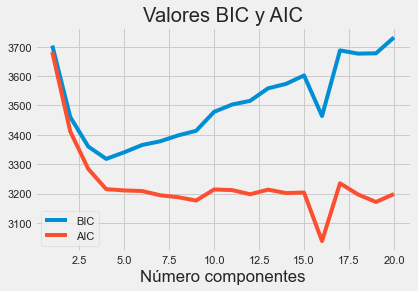

In [87]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [88]:
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")

Número óptimo acorde al BIC: 4
Número óptimo acorde al AIC: 16
